<center>

<h1 style="color: red; font-size: 70px;">Studio condizioni iniziali</h1>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

<h1 style="color: blue; font-size: 50px;"> Densità di particelle </h1>

Dato che il collasso della nube gravitazionale porta ad una regione a densità più elevata nel centro della stessa, non ha senso scegliere una densità di particelle iniziale uniforme. Infatti lavoreremo con una densità di probabilità decrescente del tipo:

$$
\sigma \, \propto \, \exp{\left[-\left(r\,-\,r_0\right)^n\right]}
$$

al di fuori di un certo raggio caratteristico $r_0$.

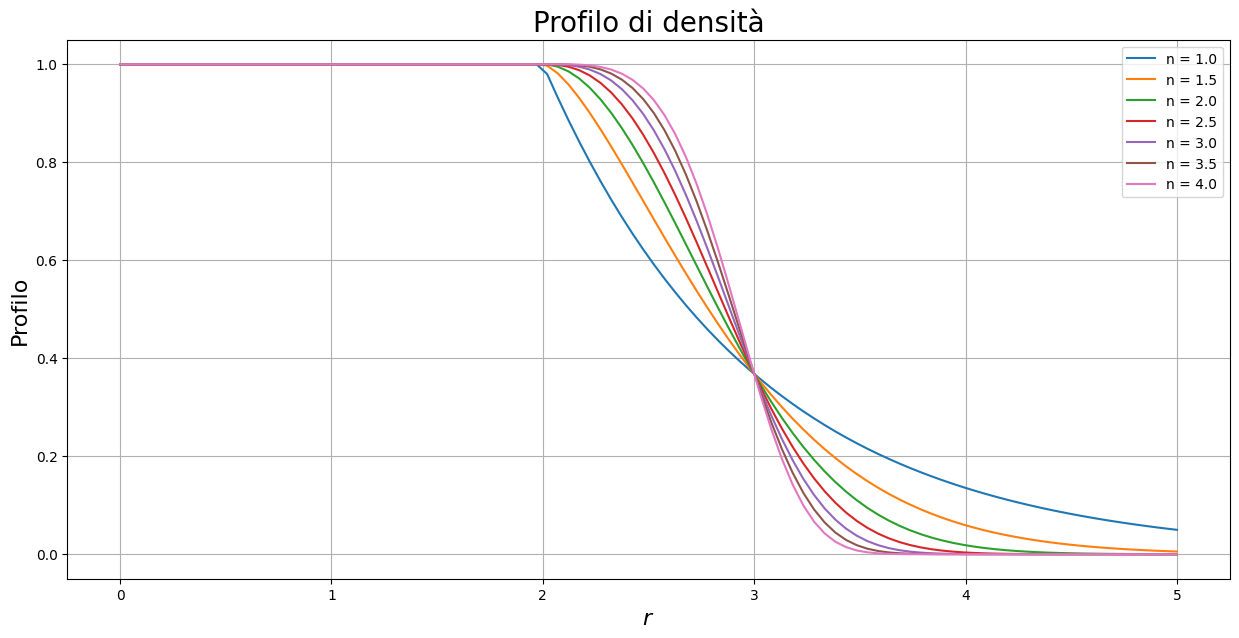

In [17]:
# Funzione per la densità di probabilità
def prof(x, r0, n):
    res = np.zeros(len(x))
    for k, i in enumerate(x):
        appo = 1
        if i > r0:
            appo = np.exp(-np.pow((i-r0), n))
        res[k] = appo
    return res


x = np.linspace(0.0, 5.0, 100)
esp = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
fig = plt.figure(figsize = (15, 7))

for es in esp:
    plt.plot(x, prof(x, 2, es), label = "n = " + str(es))

plt.title('Profilo di densità', fontsize = 20)
plt.ylabel(r'Profilo', fontsize = 16)
plt.xlabel(r'$r$', fontsize = 16)
plt.legend(loc="best")
plt.grid(True)

plt.show()

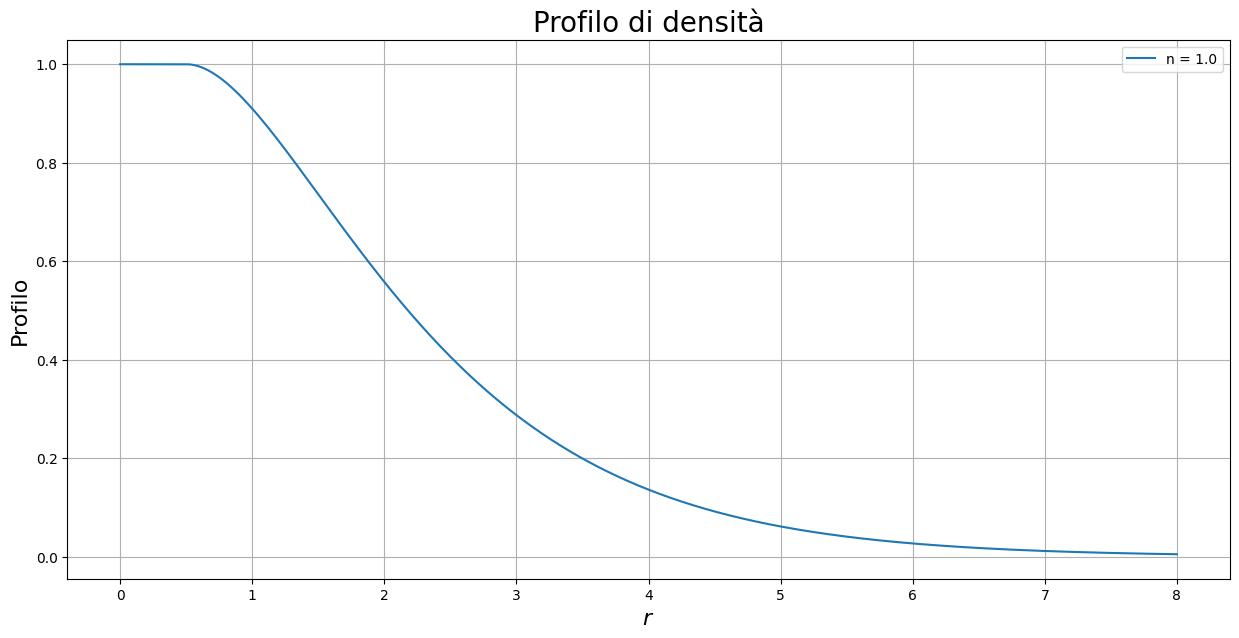

In [21]:
# Funzione per la densità di probabilità
def prof(x, r0, n):
    res = np.zeros(len(x))
    for k, i in enumerate(x):
        appo = 1
        if i > r0:
            appo = (i+1-r0)*np.exp(-np.pow((i-r0), n))
        res[k] = appo
    return res


x = np.linspace(0.0, 8.0, 1000)
fig = plt.figure(figsize = (15, 7))

plt.plot(x, prof(x, 0.5, 1.0), label = "n = 1.0")
plt.title('Profilo di densità', fontsize = 20)
plt.ylabel(r'Profilo', fontsize = 16)
plt.xlabel(r'$r$', fontsize = 16)
plt.legend(loc="best")
plt.grid(True)

plt.show()

<h1 style="color: blue; font-size: 50px;"> Profilo di velocità </h1>

Per quanto riguarda il profilo di velocità iniziale, scegliamo delle velocità azimutali coerenti con un approccio soft-kepler e scarti gaussiani pari al 10% della velocità stessa, mentre per quanto riguarda le perturbazioni radiali, anche in questo caso pensiamo a degli scostamenti gaussiani a media nulla. Per fare questo devo contare il numero di particelle all'interno di un certo raggio r, di modo da poter assegnare $v_\phi$.